## Final Project Submission

* Student names: Simon Lau, Manuel Klein
* Submission Date: 11/22/2019

# Kickstarter Project Success

**Task:**

In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


**Kickstarter Rules:**

https://www.kickstarter.com/rules?ref=global-footer

**Motivation:**

As a pledger you don't have a guarantee for getting a refund in case the fundraising goal is reached and nevertheless a project is not successful or a project is a scam.

https://www.kickstarter.com/terms-of-use#section4?ref=faq-basics_creatoroblig

https://help.kickstarter.com/hc/en-us/articles/115005048173-Can-Kickstarter-refund-the-money-if-a-project-is-unable-to-fulfill-

**Business cases:**

1. You want to croundfund your project and you are not sure if a croudfunding campaign on Kickstarter will be successful. We will find out how likely the success for your project is and tell you the most important influencing factors.


2. You want to pledge for a Kickstarter project but you are unsure if a specific project will be a success. We will find out how likely the success for the specific project is and tell you which factors influenced our estimation.


## Step 1: Importing Python libraries and dataset

In [1]:
#reset - fs # Resets the namespace by removing all names defined by the user

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
# Importing the dataset
df_orig = pd.concat([pd.read_csv(f) for f in glob.glob('CSVs/Kickstarter*.csv')], ignore_index = True)

In [26]:
df = df_orig.copy()

In [27]:
#setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

## Step 2: Understanding the data

**Description of each column (RAW data):**

* backers_count - Number of people who contributed funds to the project
* blurb - Short description of the project
* category - Contains the category and sub-category of the project
* converted_pledged_amount - Amount of money pledged, converted to the currency in the 'current_currency' column
* country - Origin country of the project creator
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format)
* creator - Name of the project creator and other information about them, e.g. Kickstarter id number
* currency - Original currency the project goal was denominated in
* currency_symbol - Symbol of the original currency the project goal was denominated in
* currency_trailing_code - Code of the original currency the project goal was denominated in
* current_currency - Currency the project goal was converted to
* deadline - Date and time of when the project will close for donations (in Unix format)
* disable_communication - Whether or not a project owner disabled communication with their backers
* friends - Unclear (null or empty)
* fx_rate - Foreign exchange rate between the original currency and the current_currency
* goal - Funding goal
* id - ID number of the project
* is_backing - Unclear (null or false)
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users
* is_starred - Whether or not a project has been starred (i.e. liked and saved) by users
* launched_at - Date and time of when the project was launched for funding (in Unix format)
* location - Contains the town or city of the project creator
* name - Name of the project
* permissions - Unclear (null or empty)
* photo - Contains a link and information to the project's photo/s
* pledged - Amount pledged in the current_currency
* profile - Details about the project's profile, including id number and various visual settings
* slug - Name of the project with hyphens instead of spaces
* source_url - URL for the project's category
* spotlight - After a project has been successful, it is spotlighted on the Kickstarter website
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live
* state - Whether a project was successful, failed, canceled, suspending or still live
* state_changed_at - Date and time of when a project's status was changed (same as the deadline for successful and failed projects) (in Unix format)
* static_usd_rate - Conversion rate between the original currency and USD
* urls - URL to the project's page
* usd_pledged - Amount pledged in USD
* usd_type - Domestic or international


**Features to be removed:**

* friends - Does not contain any data
* is_backing - Does not contain any data
* permissions - Does not contain any data
* is_starred - Basically does not contain any data

Features identified as unimportant regarding success / non-success
* converted_pledged_amount
* currency
* currency_symbol
* currency_trailing_code
* current_currency
* fx_rate
* photo
* pledged
* slug
* source_url
* spotlight
* state_changed_at
* urls
* usd_type

In [28]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,USD,1391899046,False,NaN,1.0,200.0,287514992,NaN,False,NaN,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,NaN,"{""key"":""assets/011/625/534/5bea1760d7f20943c4c...",802.0,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,USD,1551801611,False,NaN,1.0,400.0,385129759,NaN,False,NaN,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,NaN,"{""key"":""assets/024/033/030/dea4e3901d10195b035...",2259.0,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2259.0,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,USD,1480607930,False,NaN,1.0,27224.0,681033598,NaN,False,NaN,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,NaN,"{""key"":""assets/014/262/672/97944960ba30239051d...",29638.0,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",29638.0,international


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

In [30]:
# No. of values in is_starred
df.is_starred.value_counts()

False    298
True       2
Name: is_starred, dtype: int64

In [31]:
# No. of values in is_starred
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

## Step 3: Preparing the data for plotting

In [32]:
# Reducing the 'state'-feature to a binary successful/failed variable
df = df.drop(df[df['state'] == 'canceled'].index, axis=0)
df = df.drop(df[df['state'] == 'live'].index, axis=0)
df = df.drop(df[df['state'] == 'suspended'].index, axis=0)

In [33]:
df.reset_index()

,index,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,USD,1391899046,False,NaN,1.000000,200.0,287514992,NaN,False,NaN,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,NaN,"{""key"":""assets/011/625/534/5bea1760d7f20943c4c...",802.00,"{""id"":822687,""project_id"":822687,""state"":""inac...",new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",8.020000e+02,international
1,1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,USD,1551801611,False,NaN,1.000000,400.0,385129759,NaN,False,NaN,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,NaN,"{""key"":""assets/024/033/030/dea4e3901d10195b035...",2259.00,"{""id"":3665299,""project_id"":3665299,""state"":""in...",princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.259000e+03,international
2,2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,USD,1480607930,False,NaN,1.000000,27224.0,681033598,NaN,False,NaN,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,NaN,"{""key"":""assets/014/262/672/97944960ba30239051d...",29638.00,"{""id"":2730508,""project_id"":2730508,""state"":""in...",their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.963800e+04,international
3,3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,USD,1544309940,False,NaN,1.128433,40000.0,1031782682,NaN,False,NaN,1540684582,"{""id"":725746,""name"":""Venice"",""slug"":""venice-ve...",WAO: THE ECO EFFECT SHOES,NaN,"{""key"":""assets/023/008/626/aef53e2f326ad4c8772...",43180.00,"{""id"":3498742,""project_id"":3498742,""state"":""ac...",wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",4.907515e+04,international
4,4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,USD,1428511017,False,NaN,1.000000,1000.0,904085819,NaN,False,NaN,1425919017,"{""id"":2479651,""name"":""Redmond"",""slug"":""redmond...",Apple Watch Development Course,NaN,"{""key"":""assets/012/061/410/1687a735d5b1316ca47...",549.00,"{""id"":1754403,""project_id"":1754403,""state"":""in...",apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5.490000e+02,domestic
5,5,77,'Eclipse' - A 30mm hard enamel pin in

In [34]:
# Converting the 'goal' feature to 'usd_goal'
# Reducing all currency values to two decimal digits
df['usd_goal'] = round((df['goal']*df['static_usd_rate']), 2)
df['usd_pledged'] = round(df['usd_pledged'], 2)

In [35]:
#building two new columns for sub- and categories by reading them from the original category column
df['sub_category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split("/")[1].split('","position"')[0], axis=1)
df['category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split('",')[0].split("/")[0], axis=1)

In [36]:
df.category.value_counts()

music           25920
film & video    25653
technology      19476
art             19217
publishing      18690
food            14948
games           12452
fashion         10764
comics           8190
design           7680
photography      7390
crafts           6549
theater          6478
journalism       5338
dance            3919
Name: category, dtype: int64

In [37]:
df['creator_id'] = df.apply(lambda x: x['creator'].split('"id":')[1].split(',"name"')[0], axis=1)
df['number_of_projects'] = df.groupby('creator_id')['creator_id'].transform('count')

In [38]:
# Data Cleaning
drop_list = ["friends", "is_backing", "is_starred", "permissions", "converted_pledged_amount", "goal", "creator",
             "creator_id", "currency", "currency_symbol", "currency_trailing_code", "current_currency", "fx_rate", 
             "photo", "pledged", "slug", "source_url", "spotlight", "state_changed_at", "urls", "usd_type"]
df.drop(columns=drop_list, inplace=True)

In [39]:
# Converting dates from unix to datetime
df_date_columns = ['created_at', 'deadline', 'launched_at']
for i in df_date_columns:
    df[i] = pd.to_datetime(df[i], origin='unix', unit='s')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 20 columns):
backers_count            192664 non-null int64
blurb                    192662 non-null object
category                 192664 non-null object
country                  192664 non-null object
created_at               192664 non-null datetime64[ns]
deadline                 192664 non-null datetime64[ns]
disable_communication    192664 non-null bool
id                       192664 non-null int64
is_starrable             192664 non-null bool
launched_at              192664 non-null datetime64[ns]
location                 192449 non-null object
name                     192664 non-null object
profile                  192664 non-null object
staff_pick               192664 non-null bool
state                    192664 non-null object
static_usd_rate          192664 non-null float64
usd_pledged              192664 non-null float64
usd_goal                 192664 non-null float64
sub_ca

**Description of each column (corrected data):**

* backers_count - Number of people who contributed funds to the project --> OK
* blurb - Short description of the project --> IGNORED FOR ML
* category - Contains the category and sub-category of the project --> CATEGORIAL
* country - Origin country of the project creator --> CATEGORIAL
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format) --> CATEGORIAL MONTHS
* creator - Name of the project creator and other information about them, e.g. Kickstarter id number --> IGNORED FOR ML
* deadline - Date and time of when the project will close for donations (in Unix format) --> 
* disable_communication - Whether or not a project owner disabled communication with their backers --> CATEGORIAL
* id - ID number of the project --> IGNORED
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users --> CATEGORIAL
* launched_at - Date and time of when the project was launched for funding (in Unix format) --> DEADLINE-LAUNCHED = RUNTIME
* location - Contains the town or city of the project creator --> IGNORED FOR ML
* name - Name of the project --> IGNORED
* profile - Details about the project's profile, including id number and various visual settings --> IGNORED
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live --> CATEGORIAL
* state - Whether a project was successful, failed, canceled, suspending or still live --> y
* static_usd_rate - Conversion rate between the original currency and USD --> OK
* usd_pledged - Amount pledged in USD --> OK
* usd_goal - Funding goal in USD --> OK
* sub_category - CATEGORIAL
* number_of_projects - number of projects per Kickstarter account --> OK

In [41]:
# Check for NaN values
df.isna().sum()

backers_count              0
blurb                      2
category                   0
country                    0
created_at                 0
deadline                   0
disable_communication      0
id                         0
is_starrable               0
launched_at                0
location                 215
name                       0
profile                    0
staff_pick                 0
state                      0
static_usd_rate            0
usd_pledged                0
usd_goal                   0
sub_category               0
number_of_projects         0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.reset_index()

,index,backers_count,blurb,category,country,created_at,deadline,disable_communication,id,is_starrable,launched_at,location,name,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,sub_category,number_of_projects
0,0,21,2006 was almost 7 years ago.... Can you believ...,music,US,2013-12-21 21:01:30,2014-02-08 22:37:26,False,287514992,False,2013-12-25 22:37:26,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,"{""id"":822687,""project_id"":822687,""state"":""inac...",False,successful,1.000000,802.00,200.00,rock,1
1,1,97,An adorable fantasy enamel pin series of princ...,art,US,2019-02-08 21:02:48,2019-03-05 16:00:11,False,385129759,False,2019-02-13 16:00:11,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,"{""id"":3665299,""project_id"":3665299,""state"":""in...",False,successful,1.000000,2259.00,400.00,mixed media,4
2,2,88,Helping a community come together to set the s...,photography,US,2016-10-23 17:06:24,2016-12-01 15:58:50,False,681033598,False,2016-11-01 14:58:50,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,"{""id"":2730508,""project_id"":2730508,""state"":""in...",True,successful,1.000000,29638.00,27224.00,photobooks,2
3,3,193,Every revolution starts from the bottom and we...,fashion,IT,2018-10-24 08:32:00,2018-12-08 22:59:00,False,1031782682,False,2018-10-27 23:56:22,"{""id"":725746,""name"":""Venice"",""slug"":""venice-ve...",WAO: THE ECO EFFECT SHOES,"{""id"":3498742,""project_id"":3498742,""state"":""ac...",False,successful,1.136525,49075.15,45461.00,footwear,2
4,4,20,Learn to build 10+ Applications in this comple...,technology,US,2015-03-07 05:35:17,2015-04-08 16:36:57,False,904085819,False,2015-03-09 16:36:57,"{""id"":2479651,""name"":""Redmond"",""slug"":""redmond...",Apple Watch Development Course,"{""id"":1754403,""project_id"":1754403,""state"":""in...",False,failed,1.000000,549.00,1000.00,software,1
5,5,77,'Eclipse' - A 30mm hard enamel pin in jet blac...,fashion,GB,2018-01-11 16:26:03,2018-02-17 11:01:13,False,1140013344,False,2018-02-02 11:01:13,"{""id"":15129,""name"":""Cardigan"",""slug"":""cardigan...",Saluki Totem Enamel Pin,"{""id"":3273518,""project_id"":3273518,""state"":""ac...",False,successful,1.419368,2141.83,567.75,accessories,2
6,6,15,Tao Of Maceo is a professionally printed journ...,publishing,US,2018-08-10 19:02:46,2018-08-20 19:00:00,False,1136128624,False,2018-08-14 14:20:31,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Quickstarter: Tao Of Maceo,"{""id"":3445550,""project_id"":3445550,""state"":""in...",False,successful,1.000000,886.00,850.00,nonfiction,2
7,7,1,Let's build and remix a new Personal Web Theme...,technology,US,2014-04-14 00:24:36,2014-11-22 18:22:00,False,1502040661,False,2014-11-11 19:21:21,"{""id"":2405641,""name"":""Fort Collins"",""slug"":""fo...",#lolnub. Web Theme Park and Story Attraction.,"{""id"":973510,""project_id"":973510,""state"":""inac...",False,failed,1.000000,30.00,20000.00,software,1
8,8,2,"A limited edition, signed and numbered hand sc...",art,US,2012-07-23 16:29:15,2012-10-06 16:37:30,False,1163929691,False,2012-09-06 16:37:30,"{""id"":2478307,""name"":""Raleigh"",""slug"":""raleigh...",Limited Edition Heroic Fireman Statuette,"{""id"":274806,""project_id"":274806,""state"":""inac...",False,failed,1.000000,70.00,14500.00,sculpture,1
9,9,31,"Play this hilarious, nonsensical card game for...",games,US,2016-06-06 17:26:56,2016-07-29 23:57:58,False,410663165,False,2016-06-28 23:57:58,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",PRATTLE,"{""id"":2548572,""project_id"":2548572,""state"":""in...",False,failed,1.000000,1344.00,10000.00,playing cards,1


In [44]:
# Check if all NaN values have been successfully dropped
df.isna().sum()

backers_count            0
blurb                    0
category                 0
country                  0
created_at               0
deadline                 0
disable_communication    0
id                       0
is_starrable             0
launched_at              0
location                 0
name                     0
profile                  0
staff_pick               0
state                    0
static_usd_rate          0
usd_pledged              0
usd_goal                 0
sub_category             0
number_of_projects       0
dtype: int64

In [45]:
# Number of dublicate IDs
df.duplicated(subset='id').sum()

23683

In [46]:
#Building a list of duplicate IDs to see where the other features are identical
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
dup_ids = duplicated.id.unique()
duplist = []
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values    
    duplist.append(df.loc[index1[0]] == df.loc[index2[0]])

In [47]:
sum(duplist)

backers_count            23683
blurb                    23683
category                 23683
country                  23683
created_at               23683
deadline                 23683
disable_communication    23683
id                       23683
is_starrable             23683
launched_at              23683
location                 23683
name                     23683
profile                  23683
staff_pick               23683
state                    23683
static_usd_rate          23672
usd_pledged              23672
usd_goal                 23672
sub_category             23683
number_of_projects       23683
dtype: int32

Almost all duplicates can be dropped as for 23672 out of 23683 rows with identical IDs, all features are identical

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
# Number of dublicate IDs
df.duplicated(subset='id').sum()

11

In [50]:
# Due to the very low number of dublicates left in the dataset, they are dropped without further analysis

In [51]:
df.drop_duplicates(subset="id", inplace=True)

In [52]:
df.duplicated(subset='id').sum()

0

In [53]:
# Data Cleaning
drop_list = ["id"]
df.drop(columns=drop_list, inplace=True)

In [54]:
df.reset_index()

,index,backers_count,blurb,category,country,created_at,deadline,disable_communication,is_starrable,launched_at,location,name,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,sub_category,number_of_projects
0,0,21,2006 was almost 7 years ago.... Can you believ...,music,US,2013-12-21 21:01:30,2014-02-08 22:37:26,False,False,2013-12-25 22:37:26,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,"{""id"":822687,""project_id"":822687,""state"":""inac...",False,successful,1.000000,802.00,200.00,rock,1
1,1,97,An adorable fantasy enamel pin series of princ...,art,US,2019-02-08 21:02:48,2019-03-05 16:00:11,False,False,2019-02-13 16:00:11,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,"{""id"":3665299,""project_id"":3665299,""state"":""in...",False,successful,1.000000,2259.00,400.00,mixed media,4
2,2,88,Helping a community come together to set the s...,photography,US,2016-10-23 17:06:24,2016-12-01 15:58:50,False,False,2016-11-01 14:58:50,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,"{""id"":2730508,""project_id"":2730508,""state"":""in...",True,successful,1.000000,29638.00,27224.00,photobooks,2
3,3,193,Every revolution starts from the bottom and we...,fashion,IT,2018-10-24 08:32:00,2018-12-08 22:59:00,False,False,2018-10-27 23:56:22,"{""id"":725746,""name"":""Venice"",""slug"":""venice-ve...",WAO: THE ECO EFFECT SHOES,"{""id"":3498742,""project_id"":3498742,""state"":""ac...",False,successful,1.136525,49075.15,45461.00,footwear,2
4,4,20,Learn to build 10+ Applications in this comple...,technology,US,2015-03-07 05:35:17,2015-04-08 16:36:57,False,False,2015-03-09 16:36:57,"{""id"":2479651,""name"":""Redmond"",""slug"":""redmond...",Apple Watch Development Course,"{""id"":1754403,""project_id"":1754403,""state"":""in...",False,failed,1.000000,549.00,1000.00,software,1
5,5,77,'Eclipse' - A 30mm hard enamel pin in jet blac...,fashion,GB,2018-01-11 16:26:03,2018-02-17 11:01:13,False,False,2018-02-02 11:01:13,"{""id"":15129,""name"":""Cardigan"",""slug"":""cardigan...",Saluki Totem Enamel Pin,"{""id"":3273518,""project_id"":3273518,""state"":""ac...",False,successful,1.419368,2141.83,567.75,accessories,2
6,6,15,Tao Of Maceo is a professionally printed journ...,publishing,US,2018-08-10 19:02:46,2018-08-20 19:00:00,False,False,2018-08-14 14:20:31,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Quickstarter: Tao Of Maceo,"{""id"":3445550,""project_id"":3445550,""state"":""in...",False,successful,1.000000,886.00,850.00,nonfiction,2
7,7,1,Let's build and remix a new Personal Web Theme...,technology,US,2014-04-14 00:24:36,2014-11-22 18:22:00,False,False,2014-11-11 19:21:21,"{""id"":2405641,""name"":""Fort Collins"",""slug"":""fo...",#lolnub. Web Theme Park and Story Attraction.,"{""id"":973510,""project_id"":973510,""state"":""inac...",False,failed,1.000000,30.00,20000.00,software,1
8,8,2,"A limited edition, signed and numbered hand sc...",art,US,2012-07-23 16:29:15,2012-10-06 16:37:30,False,False,2012-09-06 16:37:30,"{""id"":2478307,""name"":""Raleigh"",""slug"":""raleigh...",Limited Edition Heroic Fireman Statuette,"{""id"":274806,""project_id"":274806,""state"":""inac...",False,failed,1.000000,70.00,14500.00,sculpture,1
9,9,31,"Play this hilarious, nonsensical card game for...",games,US,2016-06-06 17:26:56,2016-07-29 23:57:58,False,False,2016-06-28 23:57:58,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",PRATTLE,"{""id"":2548572,""project_id"":2548572,""state"":""in...",False,failed,1.000000,1344.00,10000.00,playing cards,1


In [55]:
df["duration"] = df.deadline - df.launched_at
df['duration'] = df.apply(lambda x: x['duration'].days, axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 0 to 209220
Data columns (total 20 columns):
backers_count            168764 non-null int64
blurb                    168764 non-null object
category                 168764 non-null object
country                  168764 non-null object
created_at               168764 non-null datetime64[ns]
deadline                 168764 non-null datetime64[ns]
disable_communication    168764 non-null bool
is_starrable             168764 non-null bool
launched_at              168764 non-null datetime64[ns]
location                 168764 non-null object
name                     168764 non-null object
profile                  168764 non-null object
staff_pick               168764 non-null bool
state                    168764 non-null object
static_usd_rate          168764 non-null float64
usd_pledged              168764 non-null float64
usd_goal                 168764 non-null float64
sub_category             168764 non-null object
numbe

## Step 4: Plotting

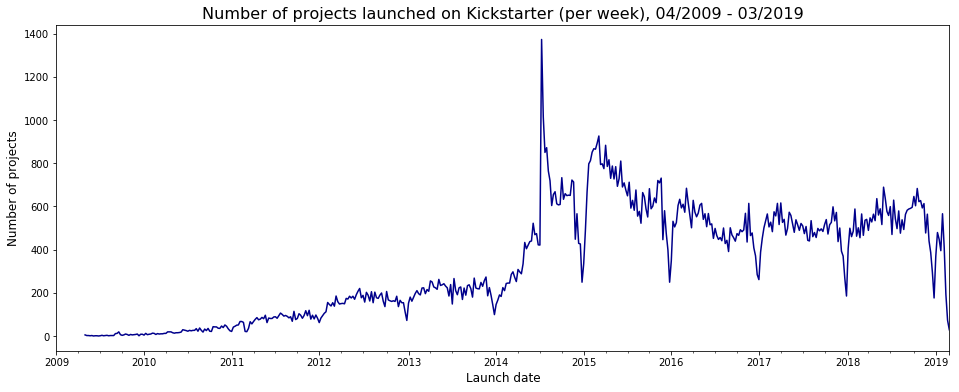

In [36]:
# Plotting the number of projects launched per week
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-02-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

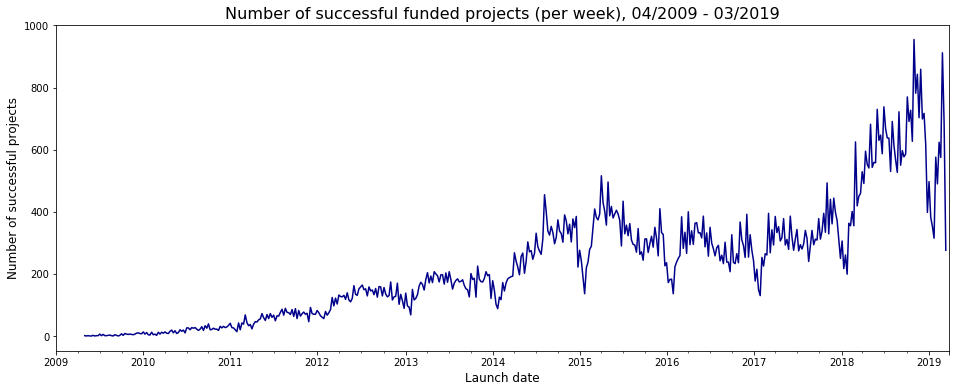

In [94]:
# Plotting the number of projects launched per week
plt.figure(figsize=(16,6))
df[df['state'] == 'successful'].set_index('deadline').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-03-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of successful projects', fontsize=12)
plt.title('Number of successful funded projects (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

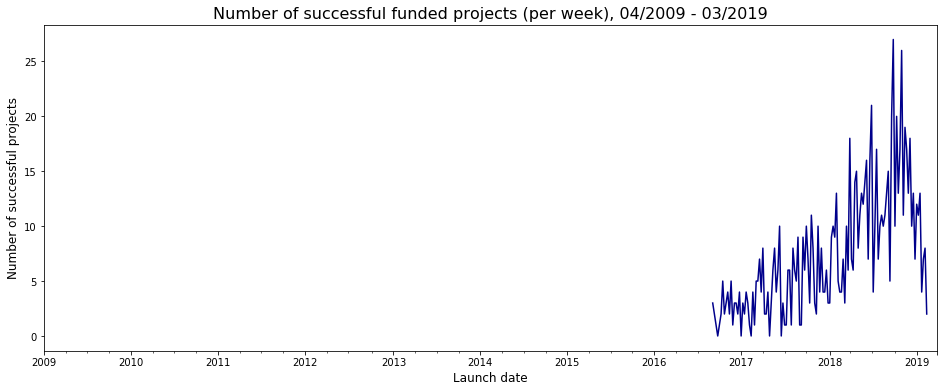

In [97]:
# Plotting the number of projects launched per week
plt.figure(figsize=(16,6))
df[df['country'] == 'HK'].set_index('launched_at').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-03-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of successful projects', fontsize=12)
plt.title('Number of successful funded projects (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

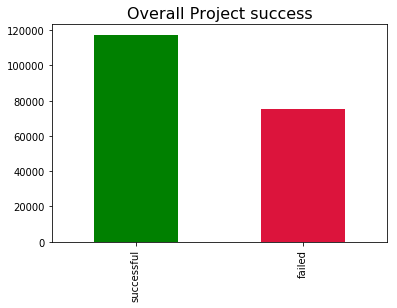

In [119]:
plt.title('Overall Project success', fontsize=16)
df.state.value_counts().plot(kind='bar', color=['green', 'crimson']);

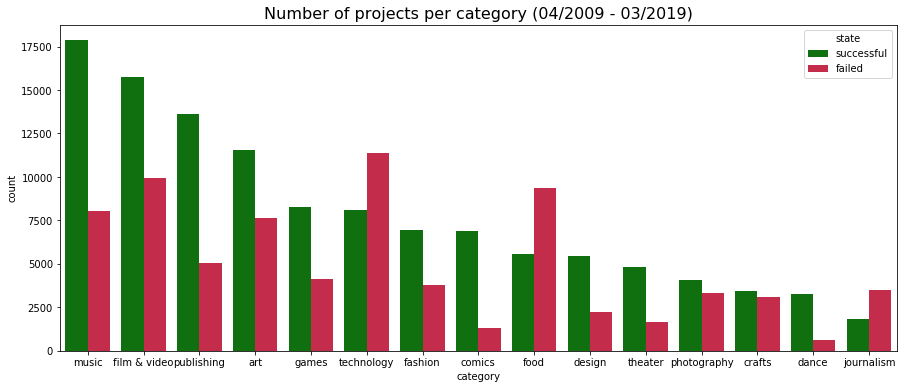

In [99]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
plt.title('Number of projects per category (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df['category'], hue=df['state'], palette = ['green', 'crimson'], order = df[df['state'] == 'successful']['category'].value_counts().index)

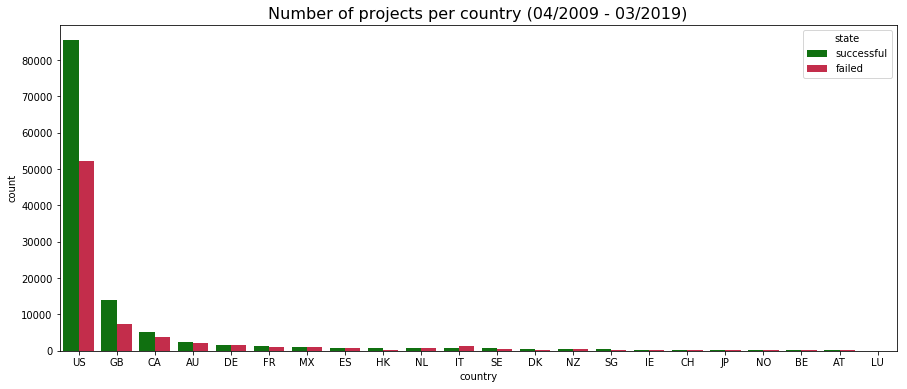

In [100]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df['country'], hue=df['state'], palette = ['green', 'crimson'], order = df[df['state'] == 'successful']['country'].value_counts().index)

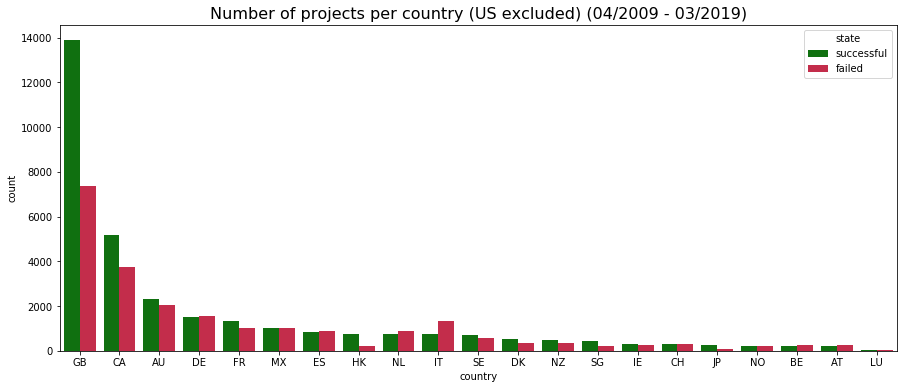

In [110]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (US excluded) (04/2009 - 03/2019)', fontsize=16)
sns.countplot(x=df.drop(df[df['country'] == 'US'].index, axis=0)['country'], hue=df['state'], palette = ['green', 'crimson'], order = df.drop(df[df['country'] == 'US'].index, axis=0)[df.drop(df[df['country'] == 'US'].index, axis=0)['state'] == 'successful']['country'].value_counts().index)

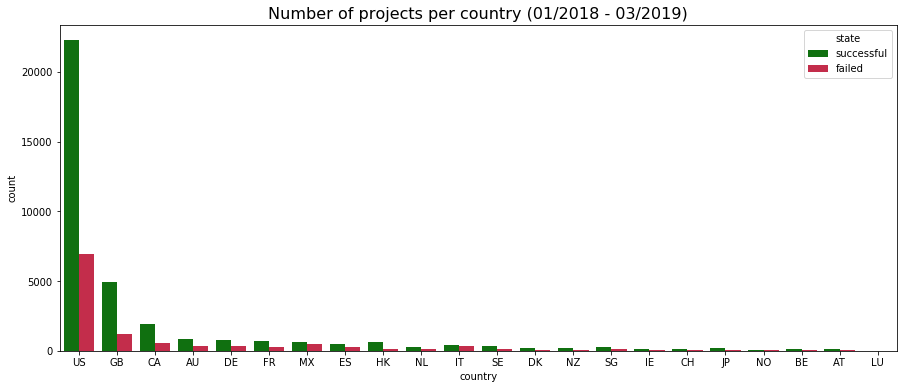

In [114]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
plt.title('Number of projects per country (01/2018 - 03/2019)', fontsize=16)
sns.countplot(x=df[df['deadline'] > datetime.datetime(2018,1,1)]['country'], hue=df['state'], palette = ['green', 'crimson'], order = df[df['state'] == 'successful']['country'].value_counts().index)

In [18]:
df.duplicated(subset="creator_acc").value_counts()

False    140933
True      51731
dtype: int64

In [71]:
df['launched_at'].max()

Timestamp('2019-03-06 05:07:40')

In [120]:
year_count = df.set_index("launched_at").category.resample("M").count()
failed_count = df[df["state"] == "failed"].set_index("launched_at").category.resample("M").count()
count = failed_count / year_count *100

In [123]:
# Plotting the number of projects launched per week
plt.figure(figsize=(16,6))
[count].set_index('deadline').category.resample('W').count().plot(color='darkblue')
plt.xlim('2009-01-01', '2019-03-28')
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of successful projects', fontsize=12)
plt.title('Number of successful funded projects (per week), 04/2009 - 03/2019', fontsize=16)
plt.show()

AttributeError: 'list' object has no attribute 'set_index'

<Figure size 1152x432 with 0 Axes>

In [54]:
failed_count = df[df["state"] == "successful"].set_index("duration").count()
failed_count

backers_count            94614
blurb                    94614
category                 94614
country                  94614
created_at               94614
deadline                 94614
disable_communication    94614
id                       94614
is_starrable             94614
launched_at              94614
location                 94614
name                     94614
profile                  94614
staff_pick               94614
state                    94614
static_usd_rate          94614
usd_pledged              94614
usd_goal                 94614
sub_category             94614
creator_acc              94614
dtype: int64

In [ ]:
# Plotting the number of projects launched per week
sns.lineplot(x="duration", y="signal", hue="event")

(1, 61)

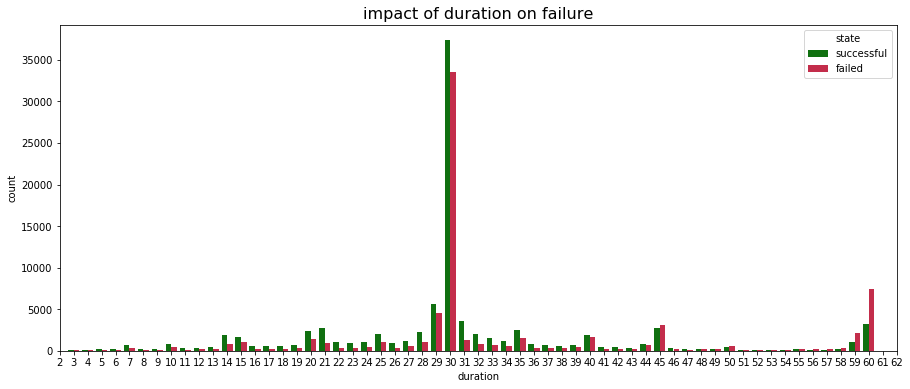

In [57]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
plt.title('impact of duration on failure', fontsize=16)
sns.countplot(x=df['duration'], hue=df['state'], palette = ['green', 'crimson'])
plt.xlim(1, 61)

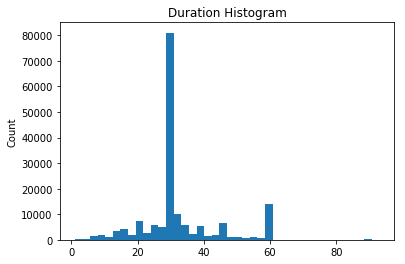

In [65]:
plt.hist(df['duration'], bins=40)
plt.gca().set(title='Duration Histogram', ylabel='Count');
plt.show()

successful_count = df[df["state"] == "successful"].set_index("duration").category
failed_count = df[df["state"] == "failed"].set_index("duration").category
count = successful_count / (successful_count + failed_count) *100

In [ ]:
count

## Step 5: Data Preparation for ML

**Description of each column (corrected data):**

* backers_count - Number of people who contributed funds to the project --> OK
* blurb - Short description of the project --> IGNORED FOR ML
* category - Contains the category and sub-category of the project --> CATEGORIAL
* country - Origin country of the project creator --> CATEGORIAL
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format) --> CATEGORIAL MONTHS
* deadline - Date and time of when the project will close for donations (in Unix format) --> 
* disable_communication - Whether or not a project owner disabled communication with their backers --> CATEGORIAL
* id - ID number of the project --> IGNORED
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users --> CATEGORIAL
* launched_at - Date and time of when the project was launched for funding (in Unix format) --> DEADLINE-LAUNCHED = RUNTIME
* location - Contains the town or city of the project creator --> IGNORED FOR ML
* name - Name of the project --> IGNORED
* profile - Details about the project's profile, including id number and various visual settings --> IGNORED
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live --> CATEGORIAL
* state - Whether a project was successful, failed, canceled, suspending or still live --> y
* static_usd_rate - Conversion rate between the original currency and USD --> OK
* usd_pledged - Amount pledged in USD --> OK
* usd_goal - Funding goal in USD --> OK
* sub_category - CATEGORIAL
* number_of_projects - number of projects per Kickstarter account --> OK

In [63]:
#creating columns for year and month when the project was created (care then using this code when using data from year 2100+)
df['year_created'] = df.apply(lambda x: x['created_at'].year, axis=1)-2000
df['month_created'] = df.apply(lambda x: x['created_at'].month, axis=1)

In [57]:
y = df.state

In [65]:
X = df.drop(columns = ['state', 'blurb', 'deadline', 'launched_at', 'location', 'name', 'profile', 'created_at'])

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 0 to 209220
Data columns (total 14 columns):
backers_count            168764 non-null int64
category                 168764 non-null object
country                  168764 non-null object
disable_communication    168764 non-null bool
is_starrable             168764 non-null bool
staff_pick               168764 non-null bool
static_usd_rate          168764 non-null float64
usd_pledged              168764 non-null float64
usd_goal                 168764 non-null float64
sub_category             168764 non-null object
number_of_projects       168764 non-null int64
duration                 168764 non-null int64
year_created             168764 non-null int64
month_created            168764 non-null int64
dtypes: bool(3), float64(3), int64(5), object(3)
memory usage: 15.9+ MB


In [ ]:
#test